In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import utils
import preprocess
import detect_answer 
import detect_cross

In [2]:
plt.rcParams['figure.figsize'] = [8, 8]

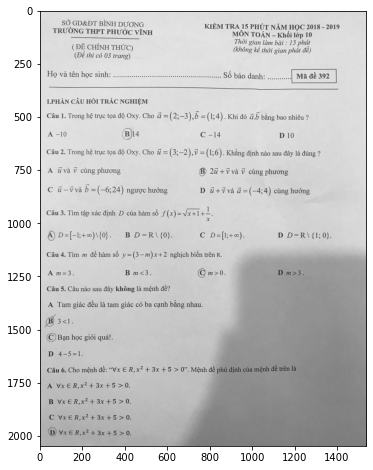

In [3]:
img = cv2.imread('exam1.png', 0)
plt.imshow(img, cmap='gray')

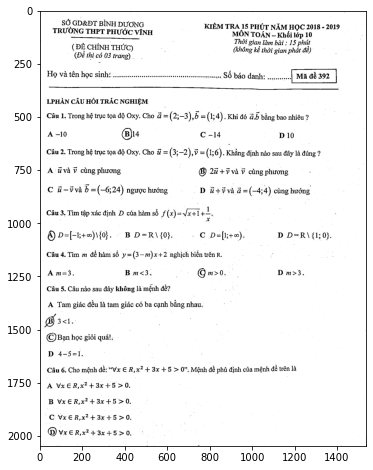

In [4]:
binary_img =preprocess.preprocess(img)

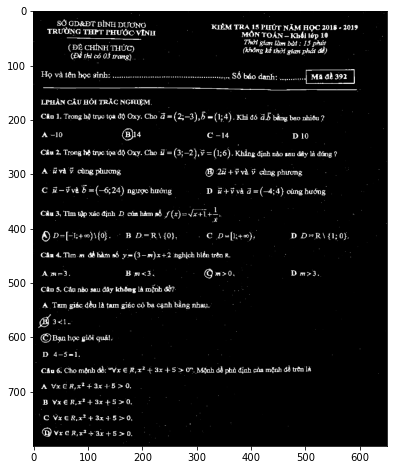

In [5]:
close = utils.closing(binary_img, (2,2))

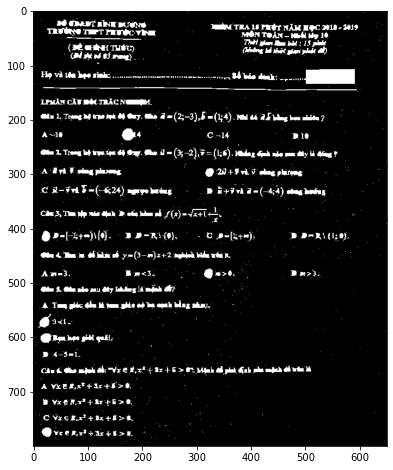

In [6]:
filled = utils.fill_holes(close)

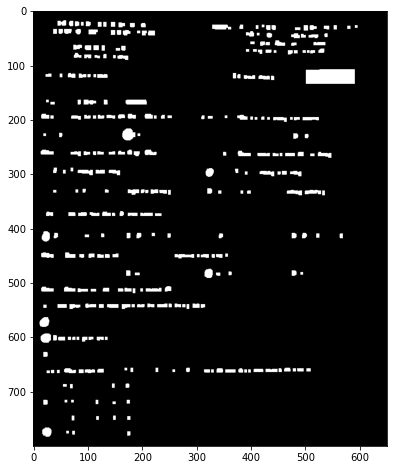

In [7]:
open = utils.opening(filled, (5,5))

In [8]:
contours = utils.find_contours(open)

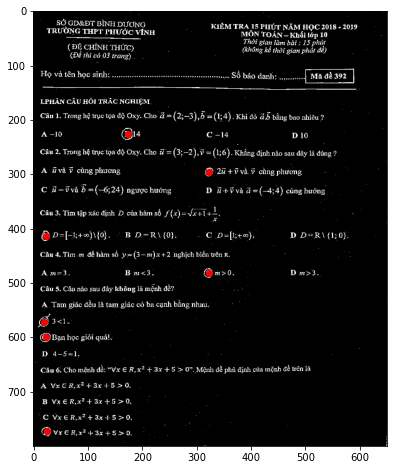

[[25, 773],
 [23, 600],
 [20, 571],
 [322, 482],
 [23, 414],
 [323, 296],
 [174, 226]]

In [9]:
circle_centers = utils.detect_circle(binary_img, contours, 0.7, 135)
circle_centers

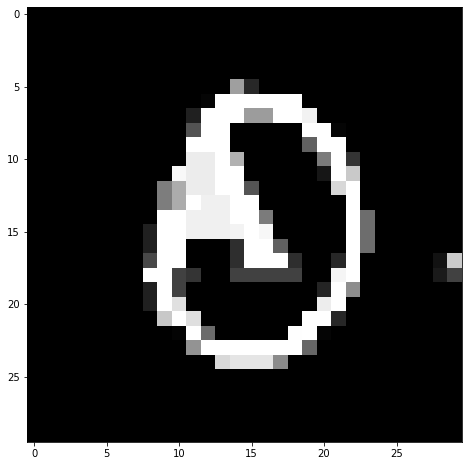

In [10]:
choices = detect_cross.get_circles_no_cross(close, circle_centers)
plt.imshow(choices[3], cmap='gray')

In [11]:
answers = detect_answer.get_answer(choices)
answers

[1, 1, 0, 2, 2, 3]

In [12]:
right_answers = ['B', 'B', 'A', 'A', 'A', 'C']
right_answers = detect_answer.convert_answer_type(right_answers)
right_answers

[1, 1, 0, 0, 0, 2]

In [13]:
score = utils.get_score(answers, right_answers)
print(score)

5.0
